Boundaries
Calculation
DIM
Divisions
Hamiltonian
IS_COMPLEX
L
LattVectors
MU
NOrbitals
OrbPositions
PRECISION


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


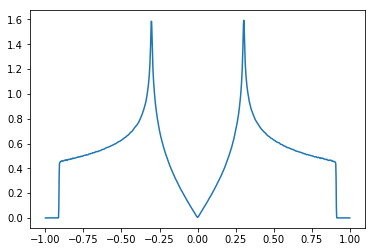

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
f = h5py.File("test_f.h5", "r")
mu = f['MU'][:]

for it in f:
    print(it)
f.close()

def gJ(n,M):
    p = np.pi/(M + 1)
    return ((M - n + 1) *np.cos(p * n) + np.sin(p*n)*np.cos(p)/np.sin(p))/(M+1)

en = np.linspace(-0.999,0.999,1000)
T = np.array([1 + 0*en, en])
dos = 0.5 * mu[0] * T[0] *gJ(0,mu.size) + mu[1]*T[1]*gJ(1,mu.size)
for i in range(2,mu.size):
    T[i%2] = 2* en * T[(i - 1)%2] - T[i%2]
    dos = dos + mu[i] * T[i%2]*gJ(i,mu.size)
plt.plot(en,2*dos/np.pi/np.sqrt(1.-en**2))


# Density of states

$$\frac{1}{\pi\sqrt{1-E^{2}}}\sum_{n=0}^{+\infty}\frac{2\mu_{n}}{1+\delta_{n,0}}T_{n}(E)$$

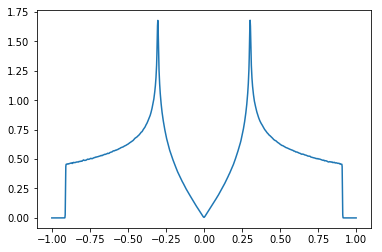

In [2]:
f = h5py.File("Old/output.h5", "r")
mup = f['MUR'][:]

def gJ(n,M):
    p = np.pi/(M + 1)
    return ((M - n + 1) *np.cos(p * n) + np.sin(p*n)*np.cos(p)/np.sin(p))/(M+1)

T = np.array([1 + 0*en, en])
dosp =  mup[0] * T[0] *gJ(0,mup.size) + mup[1]*T[1]*gJ(1,mup.size)

for i in range(2,mup.size):
    T[i%2] = 2* en * T[(i - 1)%2] - T[i%2]    
    dosp = dosp + mup[i] * T[i%2]*gJ(i,mup.size)
    
plt.plot(en,2*dosp/np.pi/np.sqrt(1. - en**2))

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


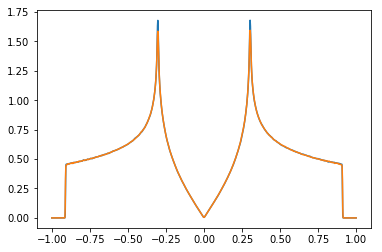

In [3]:
plt.plot(en,2*dosp/np.pi/np.sqrt(1. - en**2), en,2*dos/np.pi/np.sqrt(1. - en**2))